Function transformer

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [18]:
df=pd.read_excel("loan data.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0001,Male,Yes,NaN,Graduate,2792,4597.524145,133.0,360.0,NaN,Urban,Y
1,LP0002,NaN,NaN,3+,NaN,5885,0.000000,184.0,120.0,1.0,Rural,Y
2,LP0003,Male,Yes,1,Graduate,3832,0.000000,NaN,120.0,0.0,Rural,Y
3,LP0004,Female,NaN,2,Not Grad,6119,0.000000,NaN,240.0,NaN,NaN,Y
4,LP0005,Male,NaN,0,Not Grad,6434,1071.799900,NaN,360.0,NaN,NaN,N


In [3]:
df.isnull().sum()

Loan_ID                 0
Gender                692
Married               673
Dependents            415
Education             672
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount           1039
Loan_Amount_Term      375
Credit_History        688
Property_Area         523
Loan_Status             0
dtype: int64

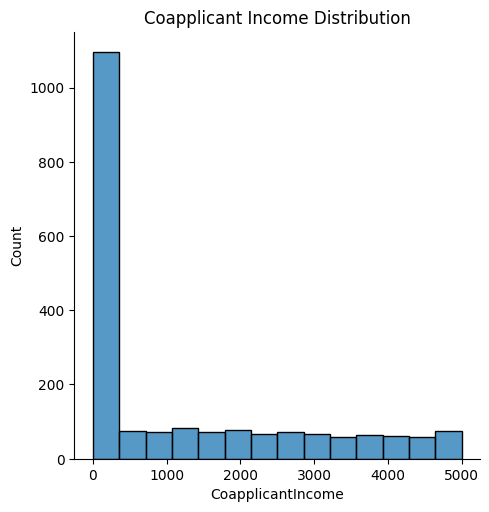

In [28]:
sns.displot(df["CoapplicantIncome"])
plt.title("Coapplicant Income Distribution")
plt.show()

In [5]:
df.shape

(2000, 12)

In [6]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)
iqr = q3 - q1

In [13]:
min_range = q1 - 1.5 * iqr
max_range = q3 + 1.5 * iqr
min_range, max_range

(np.float64(-3396.4311252469392), np.float64(5660.718542078232))

In [16]:
df=df[df['CoapplicantIncome']<=min_range]


In [19]:
from sklearn.preprocessing import FunctionTransformer

In [21]:
ft = FunctionTransformer(func=np.log1p)

In [22]:
ft.fit(df["CoapplicantIncome"])

FunctionTransformer(func=<ufunc 'log1p'>)

In [23]:
ft.transform(df["CoapplicantIncome"])

0       8.433491
1       0.000000
2       0.000000
3       0.000000
4       6.978027
          ...   
1995    0.000000
1996    7.305026
1997    0.000000
1998    8.509211
1999    0.000000
Name: CoapplicantIncome, Length: 2000, dtype: float64

In [24]:
df['CoapplicantIncome_tf'] = ft.transform(df["CoapplicantIncome"])

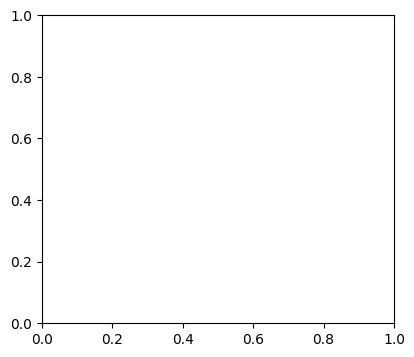

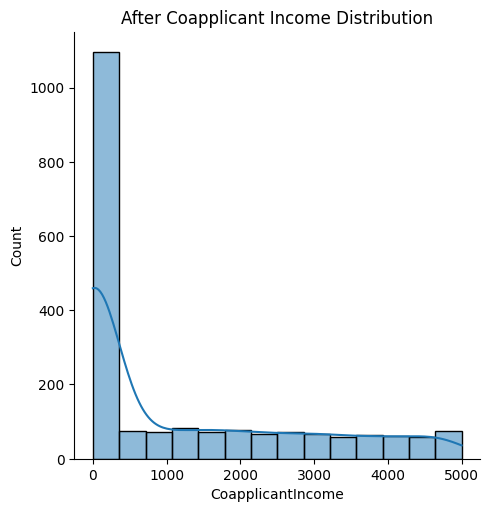

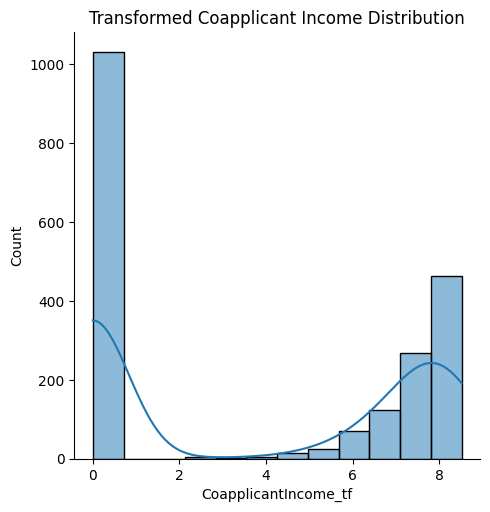

In [38]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.displot(df["CoapplicantIncome"], kde=True)
plt.title("After Coapplicant Income Distribution")


sns.displot(df["CoapplicantIncome_tf"], kde=True)
plt.title("Transformed Coapplicant Income Distribution")

plt.show()

In [30]:
ft1 = FunctionTransformer(func= lambda X: X**2)
ft1.fit(df["CoapplicantIncome"])
df['CoapplicantIncome_tf1'] = ft1.transform(df["CoapplicantIncome"])

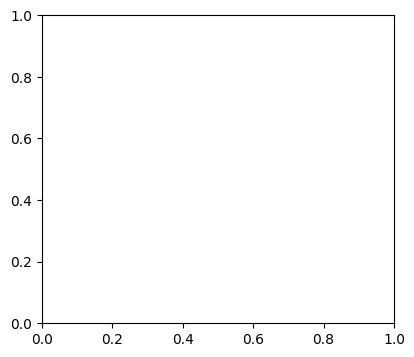

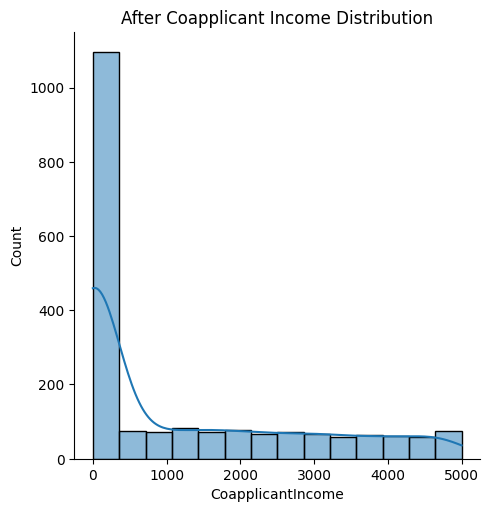

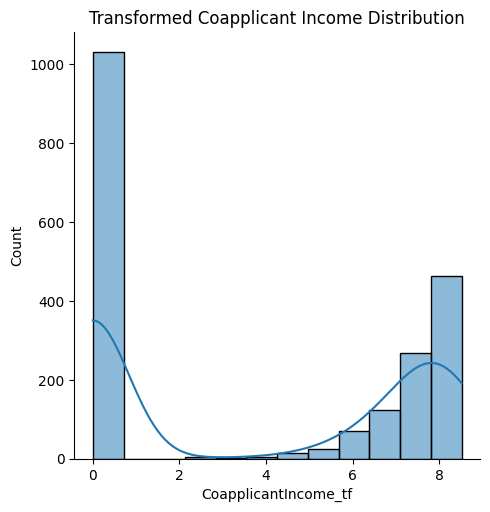

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.displot(df["CoapplicantIncome"], kde=True)
plt.title("After Coapplicant Income Distribution")


sns.displot(df["CoapplicantIncome_tf"], kde=True)
plt.title("Transformed Coapplicant Income Distribution")
plt.show()